In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [67]:
df = pd.read_csv('age_gender.csv')
df['pixels']=df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
X = np.array(df['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)
Y = df['gender']

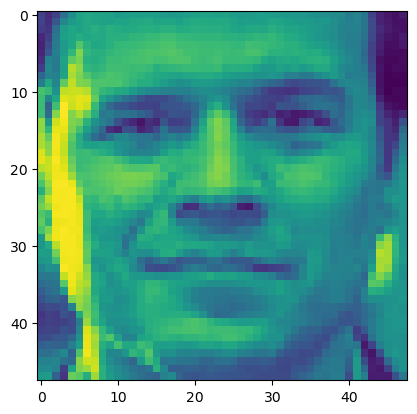

In [84]:
idx = random.randint(0, len(X))
plt.imshow(X[idx, :])
plt.show()

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=37)

In [79]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (48, 48, 1)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [80]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [81]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20


297/297 [==============================] - 8s 23ms/step - loss: 0.9793 - accuracy: 0.7706
Epoch 2/20
297/297 [==============================] - 7s 23ms/step - loss: 0.3474 - accuracy: 0.8425
Epoch 3/20
297/297 [==============================] - 7s 23ms/step - loss: 0.3019 - accuracy: 0.8677
Epoch 4/20
297/297 [==============================] - 7s 23ms/step - loss: 0.2737 - accuracy: 0.8810
Epoch 5/20
297/297 [==============================] - 7s 23ms/step - loss: 0.2632 - accuracy: 0.8844
Epoch 6/20
297/297 [==============================] - 7s 23ms/step - loss: 0.2392 - accuracy: 0.8974
Epoch 7/20
297/297 [==============================] - 7s 23ms/step - loss: 0.2131 - accuracy: 0.9097
Epoch 8/20
297/297 [==============================] - 7s 23ms/step - loss: 0.1963 - accuracy: 0.9179
Epoch 9/20
297/297 [==============================] - 7s 23ms/step - loss: 0.1817 - accuracy: 0.9240
Epoch 10/20
297/297 [==============================] - 7s 23ms/step - loss: 0.1613 - accu

In [82]:
model.evaluate(X_test, Y_test)

149/149 [==============================] - 1s 5ms/step - loss: 0.5962 - accuracy: 0.8608


[0.5961534976959229, 0.860788881778717]

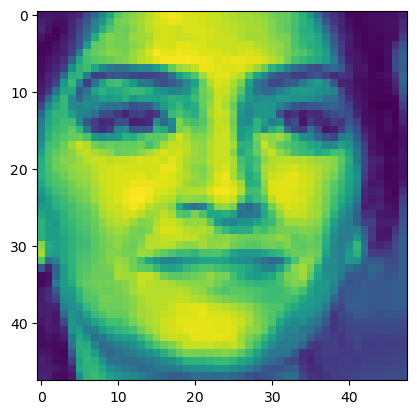

1/1 [==============================] - 0s 24ms/step
Our models says she is a female


In [104]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,48,48,1))
y_pred = y_pred > 0.5

if(y_pred == 0):
    print('Our models says he is a male')
else:
    print('Our models says she is a female')